In [26]:
import pandas as pd
import numpy as np

# Prepare Data

In [9]:
df = pd.read_csv('salary-job-data.csv')

In [10]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [19]:
# lower case the columns and replace whitespace with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [20]:
df.dtypes

age                    float64
gender                  object
education_level         object
job_title               object
years_of_experience    float64
salary                 float64
dtype: object

In [23]:
# isolate the columns containing strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['gender', 'education_level', 'job_title']

In [24]:
# now all strings should be lower and camel cased
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,male,bachelor's,software_engineer,5.0,90000.0
1,28.0,female,master's,data_analyst,3.0,65000.0
2,45.0,male,phd,senior_manager,15.0,150000.0
3,36.0,female,bachelor's,sales_associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


# EDA

In [27]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[32. 28. 45. 36. 52.]
31

gender
['male' 'female' nan]
2

education_level
["bachelor's" "master's" 'phd' nan]
3

job_title
['software_engineer' 'data_analyst' 'senior_manager' 'sales_associate'
 'director']
174

years_of_experience
[ 5.  3. 15.  7. 20.]
28

salary
[ 90000.  65000. 150000.  60000. 200000.]
36



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='salary', ylabel='Count'>

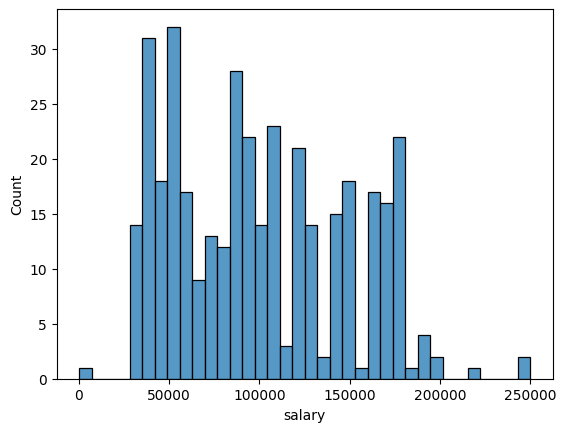

In [29]:
# plot the count of salaries in the data set
sns.histplot(df.salary, bins=36)

In [34]:
# where do we have null values and how many are there?
df.isnull().sum()

age                    2
gender                 2
education_level        2
job_title              2
years_of_experience    2
salary                 2
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [40]:
len(df_full_train), len(df_test)

(300, 75)

In [41]:
df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=1)

In [43]:
len(df_train), len(df_test), len(df_val)

(225, 75, 75)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_train.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

In [45]:
y_train = df_train.salary.values
y_val = df_val.salary.values
y_test = df_test.salary.values

In [46]:
del df_train['salary']
del df_val['salary']
del df_test['salary']

In [47]:
from sklearn.linear_model import LinearRegression

In [ ]:
# need to handle categorical variables with dict vectorizer next

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)